# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

## 0.imports

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections

### 0.1 old info imports, just for checking purposes

In [2]:
# master folder for this dataset:
master_folder = r'Z:/20180911-IMR90_whole-chr21'
# get Folders, Field-of-views
folders, fovs = ia.get_img_info.get_folders(master_folder, feature='H', verbose=True)
# analysis
analysis_folder=master_folder+os.sep+'Analysis'

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65


## 1. Create Cell_Data item

In [3]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)

<module 'ImageAnalysis3.classes' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes.py'>

### 1.0 create cell_data class and load basic info

In [4]:
# specify initialization parameters:
param = {'data_folder':'Z:/20180911-IMR90_whole-chr21',
         'fov_id': 0,
         'cell_id': 0,
         'temp_folder': r'I:\Pu_temp',
         };
# initialize cell_data class:
a = ia.classes.Cell_Data(param)

# load color_usage
a._load_color_info();
# load encoding_scheme
a._load_encoding_scheme();

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
127 folders are found according to color-usage annotation.
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Encoding_Scheme.csv
-- hyb per group: 5
-- region per group: 10
-- colors: ['750', '647', '561']
-- number of groups: [22, 22, 22]


### 1.1 Load more info for cell

In [5]:
# load existing cell_info, dont run for the first time
a._load_from_file('cell_info')
# load segmentation
a._load_segmentation(_denoise_window=0);
# load drift info
drift = a._load_drift(_size=650, _dynamic=True)


- load segmentation result from filename: Z:/20180911-IMR90_whole-chr21\Analysis\segmentation\Conv_zscan_00_segmentation.pkl
- drift already exists for cell:0, skip


### 1.2 Load and crop images from raw data

In [22]:
# load beads images
#bead_ims, bead_names = a._load_images('beads', _chromatic_correction=False, _load_in_ram=True)

# load raw un-cropped images
#splitted_ims = a._load_images('raw') 

# load cropped unique images:
#unique_ims, unique_ids, unique_channels = a._load_images('unique', _verbose=True, _save=True)

# load cropped combo images:
combo_groups = a._load_images('combo')

- get images of a fov (ia.get_img_info.get_img_fov)
-- loading field of view: Conv_zscan_01.dax


KeyboardInterrupt: 

### 1.3 Save to file 

In [974]:
#a._save_to_file('all') # save all

a._save_to_file('cell_info') # save all cell_info exclude images
#a._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

#a._save_to_file('unique') # save unique info into unique_rounds.npz

#a._save_to_file('combo') # save combo_groups into Harry's format

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['distance_reference']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl


### 1.4 Directly load from files

In [6]:
# unique
a._load_from_file('unique', _overwrite=False)
# combo
a._load_from_file('combo', _overwrite=False)
# similar examples for combo and all

- Loading unique from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\unique_rounds.npz
loading image with unique_id: 278
loading image with unique_id: 279
loading image with unique_id: 280
loading image with unique_id: 281
loading image with unique_id: 282
loading image with unique_id: 283
loading image with unique_id: 284
loading image with unique_id: 285
loading image with unique_id: 286
loading image with unique_id: 287
loading image with unique_id: 288
loading image with unique_id: 289
loading image with unique_id: 290
loading image with unique_id: 291
loading image with unique_id: 292
loading image with unique_id: 293
loading image with unique_id: 294
loading image with unique_id: 295
loading image with unique_id: 296
loading image with unique_id: 297
loading image with unique_id: 298
loading image with unique_id: 299
loading image with unique_id: 300
loading image with unique_id: 301
loading image with unique_id: 302
loading image with unique_id: 303
loading image

-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-19\channel-750\rounds.npz
-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-19\channel-647\rounds.npz
-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-19\channel-561\rounds.npz
-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-20\channel-750\rounds.npz
-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-20\channel-647\rounds.npz
-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-20\channel-561\rounds.npz
-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-21\channel-750\rounds.npz
-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-21\channel-647\rounds.npz
-- loading combo from file: Z:/20180911-IMR90_whole-chr21\Analys

## 2. Generate and Pick chromosome

### 2.1 generate and identify chromosome

In [ ]:
# generate
a._generate_chromosome_image('combo')
# identify
a._identify_chromosomes();
# manually pick for only this cell
a._pick_chromosome_manual()

# then do manual picking and close the matplotlib notebook inferface.

### 2.2 Update chromosome coordinate info

In [34]:
a._update_chromosome_from_file();

-- 2 loaded


## 3. Fitting and picking spots for decoded images

### 3.1 Load decoded images

In [7]:
a._load_from_file('decoded', _decoded_flag='top16-it2')
print(len(a.decoded_ids))

-- loading decoded result from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-0\channel-750\top16-it2\regions.npz
--- decoded result matched for group:0, color:750
--- kept ids: [5, 44, 82, 140, 203, 233, 276, 309, 412, 508]
-- loading decoded result from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-0\channel-647\top16-it2\regions.npz
--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-0\channel-561\top16-it2\regions.npz
--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-1\channel-750\top16-it2\regions.npz
--- decoded result matched for group:1, color:750
--- kept ids: [8, 47, 85, 143, 206, 255, 279, 312, 415, 511]
-- loading d

--- decoded result matched for group:11, color:750
--- kept ids: [115, 173, 224, 267, 345, 433, 465, 586, 624, 645]
-- loading decoded result from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-11\channel-647\top16-it2\regions.npz
--- decoded result matched for group:11, color:647
--- kept ids: [75, 116, 174, 265, 343, 356, 434, 533, 547, 587]
-- loading decoded result from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-11\channel-561\top16-it2\regions.npz
--- decoded result matched for group:11, color:561
--- kept ids: [117, 172, 226, 332, 354, 397, 481, 534, 585, 602]
-- loading decoded result from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-12\channel-750\top16-it2\regions.npz
--- decoded result matched for group:12, color:750
--- kept ids: [35, 74, 118, 176, 245, 333, 549, 561, 606, 627]
-- loading decoded result from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\group-12\channel-647\top16-it2\reg

### 3.2 multi-fitting

In [8]:
cand_spots = a._multi_fitting(_type='decoded', _num_threads=6, _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)
#cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)

+ Start multi-fitting for decoded images
++ start fitting decoded for fov:0, cell:0 with 6 threads
++ total time in fitting decoded: 2333.916357755661
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['decoded_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


### 3.3 picking spots by intensity

In [9]:
naive_picked_pts = a._naive_picking_spots('decoded', _save=False)

+ Pick decoded spots for by brightness in fov:0, cell:0


#### 3.2.1 distance map for one chromosome

In [10]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_picked_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

chromosome id:0, coordinate:[ 18.40221015  78.27206554 103.93315194]


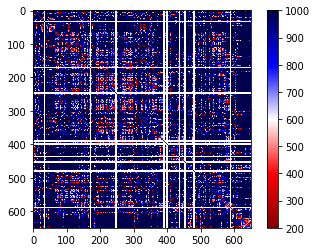

In [11]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=200, vmax=1000)
plt.colorbar()

### 3.4 dynamic picking spots

In [16]:
dynamic_picked_pts = a._dynamic_picking_spots('decoded', _w_dist=1)

+ Pick decoded spots for by brightness in fov:0, cell:0
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_decoded_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


++ generate decoded dist-map for fov:0, cell:0, chrom:0


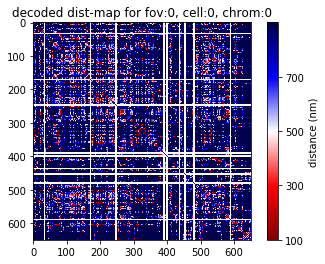

++ generate decoded dist-map for fov:0, cell:0, chrom:1


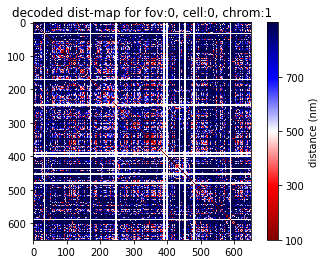

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['decoded_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


In [17]:
distmaps = a._generate_distance_map('decoded',_limits=[100,900])

## 4. Fitting and picking spots for unique images

### 4.1 Load decoded images

included in previous loading process

### 4.2 multi-fitting

In [18]:
cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)

+ Start multi-fitting for unique images
++ start fitting unique for fov:0, cell:0 with 5 threads
++ total time in fitting: 3344.830055952072
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots', 'unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


### 4.3 picking spots by intensity

In [20]:
naive_picked_pts = a._naive_picking_spots('unique', _save=False)

+ Pick unique spots for by brightness in fov:0, cell:0


#### 4.2.1 distance map for one chromosome

In [21]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_picked_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

chromosome id:0, coordinate:[ 18.40221015  78.27206554 103.93315194]


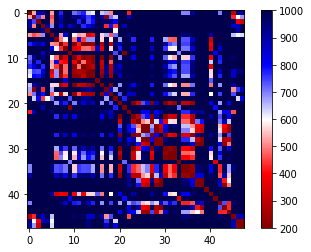

In [22]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=200, vmax=1000)
plt.colorbar()

### 4.4 dynamic picking spots

In [23]:
dynamic_picked_pts = a._dynamic_picking_spots('unique', _w_dist=1)

+ Pick unique spots for by brightness in fov:0, cell:0
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots', 'picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


++ generate unique dist-map for fov:0, cell:0, chrom:0
++ Make directory: Z:/20180911-IMR90_whole-chr21\Analysis\distmap\Conv_zscan_00


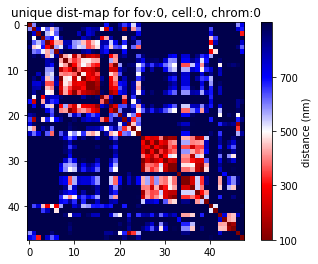

++ generate unique dist-map for fov:0, cell:0, chrom:1


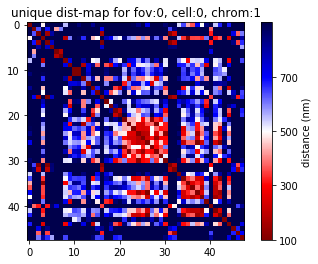

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map', 'unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


In [24]:
distmaps = a._generate_distance_map('unique',_limits=[100,900])